<img src="iris-machinelearning.png" />

### *Flower Classification using Decision Tree*

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("iris")

In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
X = df.drop(['species'], axis=1)
Y = df['species']

In [6]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y , test_size=0.2,random_state= 42)

In [8]:
print("X Train:: ",x_train.shape)
print("Y Train:: ",y_train.shape)
print("X Test :: ",x_test.shape)
print("Y Test :: ",y_test.shape)

X Train::  (120, 4)
Y Train::  (120,)
X Test ::  (30, 4)
Y Test ::  (30,)


### One hot encoding of categorical column

In [9]:
df_dup = df.copy(deep=True)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()

df_dup['species']= le.fit_transform(df_dup['species']) 
ohe = OneHotEncoder(categorical_features = [4])
Y = ohe.fit_transform(df_dup)

/home/sachin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/sachin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [10]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

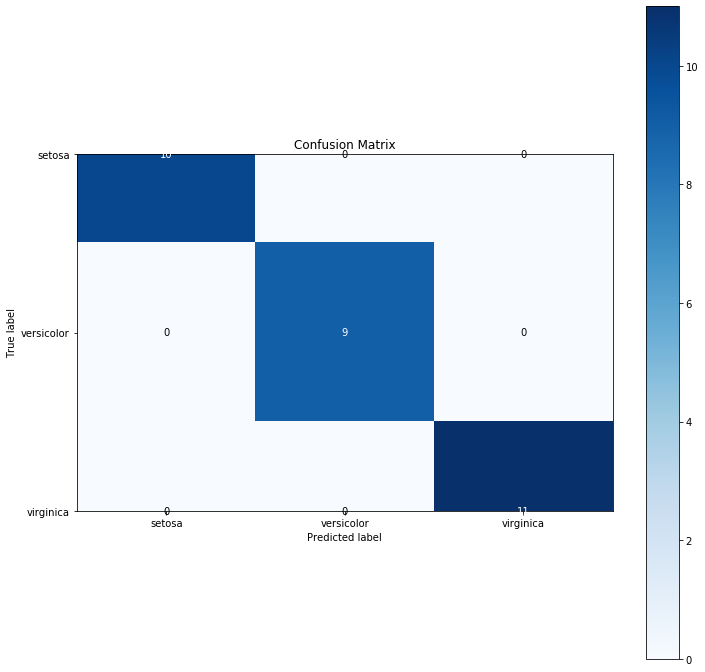

In [12]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12)
)

In [13]:
pred_list = y_pred.tolist()
actual_y = y_test.tolist()

dataFrame  = pd.concat([pd.DataFrame(actual_y),pd.DataFrame(pred_list)],axis=1)
dataFrame.columns = ["Real","Predicted"]

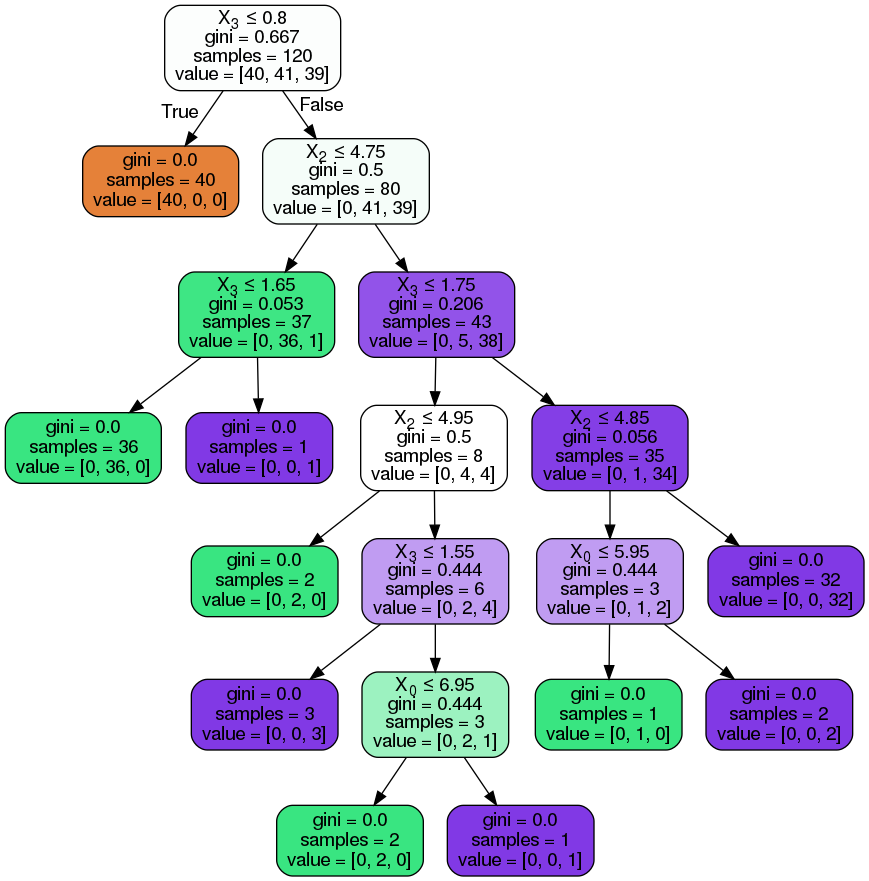

In [14]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO 

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())